In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import scipy.optimize._minimize as minim
import scipy.optimize as opt
import matplotlib.pyplot as plt
import social_inference as si
from sklearn.metrics import mean_squared_error
%matplotlib inline

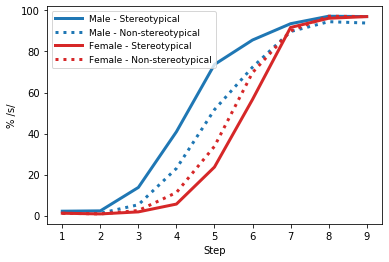

In [3]:
# read in S&J1996 values
df = pd.read_csv('Strand_Johnson_1996_estimation.csv')

# process data frames in pandas
df1 = df[['step','ave_F2F3','Proto_Female_percent','Proto_Male_percent','NonProto_Female_percent','NonProto_Male_percent']]
m = pd.melt(df1,id_vars=['step','ave_F2F3'],var_name="Condition",value_name="percent")
m['Condition'] = m.Condition.str.replace('_percent','')

# subset data frames by speaker type
pm = m.loc[m['Condition'] == 'Proto_Male']
npm = m.loc[m['Condition'] == 'NonProto_Male']
pf = m.loc[m['Condition'] == 'Proto_Female']
npf = m.loc[m['Condition'] == 'NonProto_Female']

#plotting

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(pm['step'],pm['percent'],linestyle="-",linewidth=3,color='#1f77b4',label='Male - Stereotypical')
ax.plot(npm['step'],npm['percent'],linestyle=":",linewidth=3,color='#1f77b4',label='Male - Non-stereotypical')
ax.plot(pf['step'],pf['percent'],linestyle="-",linewidth=3,color='#d62728',label='Female - Stereotypical')
ax.plot(npf['step'],npf['percent'],linestyle=":",linewidth=3,color='#d62728',label='Female - Non-stereotypical')

ax.legend(loc='upper left',handlelength=3,fontsize=9)
ax.set_xlabel('Step')
ax.set_ylabel('% /s/')
plt.show()

# Optimization

In this section, we're doing the first step of parameter fitting: figuring out the optimal prior values (means and variances for "s" and "sh") for the stereotypical male and female speakers.

We're not combining/integrating priors for men and women in this stage, because we're assuming the mixing proportions for **stereotypical** speakers are 0 or 1. This corresponds to the assumption that listeners have complete confidence on the gender identity they assign to the stereotypical speakers.

In [4]:
#####
# values from Perkell et al. 
f_s_m = 5926.5
f_s_v = 307.5
f_sh_m = 4962 
f_sh_v = 220

m_s_m = 5776
m_s_v = 247.5
m_sh_m = 4575
m_sh_v = 290.5
#####

#####
# define cost function for prototypical male
# params = [s_mean,s_variance,sh_mean,sh_variance]
def pm_to_opt(params):
    # posterior probability following bayes model
    s_cat = st.norm.pdf(pm['ave_F2F3'],params[0],params[1])
    # posterior probability following bayes model
    sh_cat = st.norm.pdf(pm['ave_F2F3'],params[2],params[3])
    # convert posterior probability into percentage
    pred_per_s = 100* (np.array(s_cat, dtype=np.float)/(np.array(s_cat, dtype=np.float) + np.array(sh_cat, dtype=np.float)))
    # calculate error
    mse = mean_squared_error(pm['percent'],pred_per_s)
    return mse
#####

#####
# define cost function for prototypical female
# params = [s_mean,s_variance,sh_mean,sh_variance]
def pf_to_opt(params):
    # posterior probability following bayes model
    s_cat = st.norm.pdf(pf['ave_F2F3'],params[0],params[1])
    # posterior probability following bayes model
    sh_cat = st.norm.pdf(pf['ave_F2F3'],params[2],params[3])
    # convert posterior probability into percentage
    pred_per_s = 100* (np.array(s_cat, dtype=np.float)/(np.array(s_cat, dtype=np.float) + np.array(sh_cat, dtype=np.float)))
    # calculate error
    mse = mean_squared_error(pf['percent'],pred_per_s)
    return mse
#####

#####
# optimize for proto male
# x0 is starting point, based on Perkell et al. (2004) values
pm_x0 = [m_s_m,m_s_v,m_sh_m,m_sh_v]
# optimized male priors
pm_res = minim.minimize(pm_to_opt,pm_x0)
print(pm_res)
#####

#####
# optimize for proto female
# x0 is starting point, based on Perkell et al. (2004) values
pf_x0 = [f_s_m,f_s_v,f_sh_m,f_sh_v]
# optimized female priors
pf_res = minim.minimize(pf_to_opt,pf_x0)
print(pf_res)
#####



      fun: 2.8341583918973456
 hess_inv: array([[ 288.96951189,  -42.46061655,  634.27969771, -107.3017165 ],
       [ -42.46061655,  402.77405642,  203.41686316,  224.97910196],
       [ 634.27969771,  203.41686316, 1640.05975326,  -11.0289025 ],
       [-107.3017165 ,  224.97910196,  -11.0289025 ,  396.01750485]])
      jac: array([ 2.59280205e-06,  4.79817390e-06,  1.99675560e-06, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 288
      nit: 32
     njev: 48
   status: 0
  success: True
        x: array([5191.98716038,  751.63933594, 3668.99072288,  963.94850519])
      fun: 2.7752118938948147
 hess_inv: array([[1307.22343048,  239.59745224,  834.82392303,  -63.31237748],
       [ 239.59745224,  428.93531549,  170.93436766, -105.31562865],
       [ 834.82392303,  170.93436766,  611.40836656,  179.28669199],
       [ -63.31237748, -105.31562865,  179.28669199,  687.10900444]])
      jac: array([ 1.49011612e-07, -5.36441803e-07, -5.36441803e-07,  5.364

# Prior Optimization Results

Let's visualize what the values from Perkell et al. and the optimized values are now for our priors for "s" and "sh".

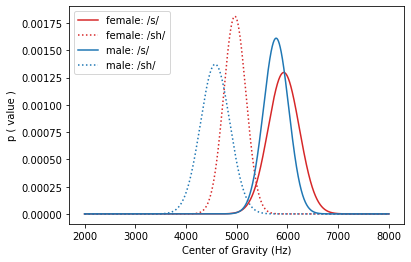

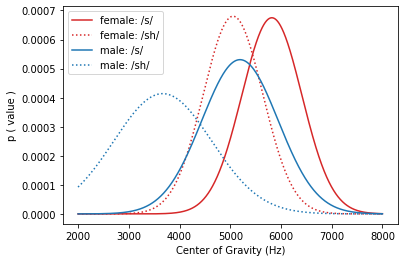

In [5]:
# values from Perkell et al. 
f_s_m = 5926.5
f_s_v = 307.5
f_sh_m = 4962 
f_sh_v = 220

m_s_m = 5776
m_s_v = 247.5
m_sh_m = 4575
m_sh_v = 290.5

# Perkell et al. production distributions
obs_dists = [(f_s_m,f_s_v,'#d62728','-','female: /s/'),(f_sh_m,f_sh_v,'#d62728',':','female: /sh/'),(m_s_m,m_s_v,'#1f77b4','-','male: /s/'),(m_sh_m,m_sh_v,'#1f77b4',':','male: /sh/')]
# Results for protoypical men and women from the optimization above
opt_dists = [(pf_res.x[0],pf_res.x[1],'#d62728','-','female: /s/'),(pf_res.x[2],pf_res.x[3],'#d62728',':','female: /sh/'),(pm_res.x[0],pm_res.x[1],'#1f77b4','-','male: /s/'),(pm_res.x[2],pm_res.x[3],'#1f77b4',':','male: /sh/')]

x_min = 2000 
x_max = 8000
x_axis = np.arange(x_min,x_max,1)

# plotting functions
for group in [obs_dists,opt_dists]:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    for dist in group:
        y_vals = [st.norm.pdf(x,dist[0],dist[1]) for x in x_axis]
        ax.plot(x_axis,y_vals,color=dist[2],linestyle=dist[3],label=dist[4])
    ax.legend(loc='upper left')
    ax.set_xlabel('Center of Gravity (Hz)')
    ax.set_ylabel('p ( value )')
    plt.show()

# Mixing Proportion Optimization

Now, we'll move to step two of the optimization technique.

We'll keep the prior values (expectations for "s" and "sh" for men and women) fixed to the optimized values above.

Then, we'll optimize on a new set of data with the non-stereotypical speakers, and choose the **optimal mixing ratio**.

In [6]:
# Using parameters for proto-typical speakers fit above, 
# see if changes in conf. parameter change provide good fits to non-proto data

# pm_res.x = [pm_s_m,pm_s_v,pm_sh_m,pm_sh_v]
# pf_res.x = [pf_s_m,pf_s_v,pf_sh_m,pf_sh_v]

#####
# define cost function for non-prototypical male speaker
def npm_to_opt(f_param):
    s_cat = []
    sh_cat = []
    
    # scale male
    s_cat.append([x * (1-f_param) for x in st.norm.pdf(npm['ave_F2F3'],pm_res.x[0],pm_res.x[1])])
    sh_cat.append([x * (1-f_param) for x in st.norm.pdf(npm['ave_F2F3'],pm_res.x[2],pm_res.x[3])])
    
    # scale female
    s_cat.append([x * (f_param) for x in st.norm.pdf(npm['ave_F2F3'],pf_res.x[0],pf_res.x[1])])
    sh_cat.append([x * (f_param) for x in st.norm.pdf(npm['ave_F2F3'],pf_res.x[2],pf_res.x[3])])
    
    # element-wise sum of all scaled pdf values
    summed_s = [sum(x) for x in zip(*s_cat)]
    summed_sh = [sum(x) for x in zip(*sh_cat)]
    
    # np.array to be able to divide correctly
    pred_per_s = 100* (np.array(summed_s, dtype=np.float)/(np.array(summed_s, dtype=np.float) + np.array(summed_sh, dtype=np.float)))
    
    # calculate Mean Squared Errors
    mse = mean_squared_error(npm['percent'],pred_per_s)
    
    return mse


# Optimize
npm_x0 = 0.5
npm_res = minim.minimize(npm_to_opt,npm_x0,bounds=((0,1),))
print(npm_res)
#####

#####
# define cost function for non-prototypical female speaker
def npf_to_opt(f_param):
    s_cat = []
    sh_cat = []
    
    # scale male
    s_cat.append([x * (1-f_param) for x in st.norm.pdf(npf['ave_F2F3'],pm_res.x[0],pm_res.x[1])])
    sh_cat.append([x * (1-f_param) for x in st.norm.pdf(npf['ave_F2F3'],pm_res.x[2],pm_res.x[3])])
    
    # scale female
    s_cat.append([x * (f_param) for x in st.norm.pdf(npf['ave_F2F3'],pf_res.x[0],pf_res.x[1])])
    sh_cat.append([x * (f_param) for x in st.norm.pdf(npf['ave_F2F3'],pf_res.x[2],pf_res.x[3])])
    
    # element-wise sum of all scaled pdf values
    summed_s = [sum(x) for x in zip(*s_cat)]
    summed_sh = [sum(x) for x in zip(*sh_cat)]
    
    #np.array to be able to divide correctly
    pred_per_s = 100* (np.array(summed_s, dtype=np.float)/(np.array(summed_s, dtype=np.float) + np.array(summed_sh, dtype=np.float)))
    
    # calculate Mean Squared Errors
    mse = mean_squared_error(npf['percent'],pred_per_s)
    
    return mse


# Optimize
npf_x0 = 0.5
npf_res = minim.minimize(npf_to_opt,npf_x0,bounds=((0,1),))
print(npf_res)
#####

      fun: 22.60450732228745
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([7.10542736e-07])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 12
      nit: 4
   status: 0
  success: True
        x: array([0.42530023])
      fun: 23.93920306659564
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.0658141e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 12
      nit: 4
   status: 0
  success: True
        x: array([0.85655133])


# Compare Observed Categorization with Cue-Integration Predicted Categorization

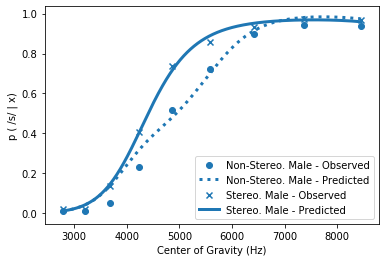

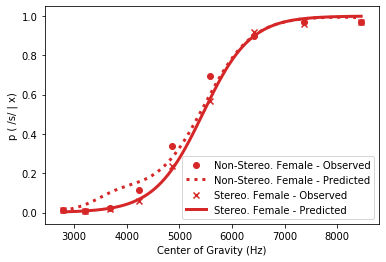

In [7]:
import operator

# initialize cats
styles = {'Proto_Male': ('#1f77b4','-','x','Stereo. Male - Predicted','Stereo. Male - Observed'), 'NonProto_Male': ('#1f77b4',':','o','Non-Stereo. Male - Predicted','Non-Stereo. Male - Observed'), 'NonProto_Female': ('#d62728',':','o','Non-Stereo. Female - Predicted','Non-Stereo. Female - Observed'), 'Proto_Female': ('#d62728','-','x','Stereo. Female - Predicted','Stereo. Female - Observed')}
f_params = {'Proto_Male': 0, 'NonProto_Male': npm_res.x[0], 'NonProto_Female': npf_res.x[0], 'Proto_Female': 1}

x_min = min(m['ave_F2F3'])
x_max = max(m['ave_F2F3'])
x_axis = np.arange(x_min,x_max,1)

for l in [['Proto_Male','NonProto_Male'],['NonProto_Female','Proto_Female']]:
    scaled_pdfs = {}
    for i, spkr in enumerate(l):
        f_param = f_params[spkr]
        s_cat = si.social_cat(('men','women'),(pm_res.x[0],pf_res.x[0]),(pm_res.x[1],pf_res.x[1]),(1.0-f_param,f_param))
        sh_cat = si.social_cat(('men','women'),(pm_res.x[2],pf_res.x[2]),(pm_res.x[3],pf_res.x[3]),(1.0-f_param,f_param))
        scaled_pdfs[str(spkr)] = {}
        s_cat.confidence_scale_pdf(x_axis)
        sh_cat.confidence_scale_pdf(x_axis)

        post = (np.array(s_cat.scaled_pdf, dtype=np.float)) / (np.array(s_cat.scaled_pdf, dtype=np.float) + np.array(sh_cat.scaled_pdf, dtype=np.float)) #np.array to be able to divide the lists
        scaled_pdfs[str(spkr)]['post_vals'] = post


    fig = plt.figure()
    ax = fig.add_subplot(111)
    ltys = []

    for pdf in scaled_pdfs.keys():
        ax.plot(x_axis,scaled_pdfs[pdf]['post_vals'],linewidth=3,label=styles[pdf][3],color=styles[pdf][0],linestyle=styles[pdf][1])

    for key, grp in m.groupby(['Condition']):
        if key in l:
            ax.scatter(grp['ave_F2F3'],(grp['percent']/100), label=styles[key][4], color=styles[key][0], marker=styles[key][2])
    ax.legend(loc='lower right',handlelength=3)
    ax.set_xlabel('Center of Gravity (Hz)')
    ax.set_ylabel('p ( /s/ | x)')
    # Sort Labels alphabetically
    handles, labels = ax.get_legend_handles_labels()
    h1 = sorted(zip(handles, labels), key=operator.itemgetter(1))
    handles2, labels2 = zip(*h1)
    ax.legend(handles2,labels2)
    plt.show()